In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Kurulum başarılı!")

Kurulum başarılı!


In [3]:
# Veriyi okuyoruz ve 'df' ismini veriyoruz
df = pd.read_csv('data/listings.csv')

# "Bana tablonun ilk 5 satırını göster" diyoruz (Başarılı mı diye kontrol için)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20240622134424,2024-06-23,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.62,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.81
1,9991,https://www.airbnb.com/rooms/9991,20240622134424,2024-06-23,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.06
2,14325,https://www.airbnb.com/rooms/14325,20240622134424,2024-06-22,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.85,4.60,4.45,NaN,f,4,4,0,0,0.15
3,16644,https://www.airbnb.com/rooms/16644,20240622134424,2024-06-23,city scrape,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/73759174/e2ef...,64696,...,4.86,4.67,4.71,NaN,f,2,2,0,0,0.28
4,17904,https://www.airbnb.com/rooms/17904,20240622134424,2024-06-23,city scrape,Beautiful Kreuzberg studio - 3 months minimum,"- apt is available starting September 1, 2024<...","The apartment is located in Kreuzberg, which i...",https://a0.muscache.com/pictures/d9a6f8be-54b9...,68997,...,4.92,4.87,4.65,NaN,f,1,1,0,0,1.71


In [11]:
# Sadece işimize yarayan sütunları seçip df'i güncelliyoruz
df = df[['id', 'name', 'neighbourhood_group_cleansed', 'room_type', 'price', 'number_of_reviews', 'review_scores_rating']]

# Sütun isimleri çok uzun
df = df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'})

# Şimdi tekrar bakalım
df.info()

KeyError: "['neighbourhood_group_cleansed'] not in index"

In [13]:

df.head()

,id,name,neighbourhood,room_type,price,number_of_reviews,review_scores_rating
0,3176,Fabulous Flat in great Location,Pankow,Entire home/apt,105.0,148,4.63
1,9991,Geourgeous flat - outstanding views,Pankow,Entire home/apt,180.0,7,5.00
2,14325,Studio Apartment in Prenzlauer Berg,Pankow,Entire home/apt,70.0,26,4.68
3,16644,In the Heart of Berlin - Kreuzberg,Friedrichshain-Kreuzberg,Entire home/apt,90.0,48,4.72
4,17904,Beautiful Kreuzberg studio - 3 months minimum,Neukölln,Entire home/apt,25.0,299,4.77


In [10]:
# $ işaretini hiçliğe, , işaretini hiçliğe çeviriyoruz ve sayı yapıyoruz
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Şimdi emin olmak için veri tiplerine bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13759 entries, 0 to 13758
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13759 non-null  int64  
 1   name                  13759 non-null  object 
 2   neighbourhood         13759 non-null  object 
 3   room_type             13759 non-null  object 
 4   price                 8821 non-null   float64
 5   number_of_reviews     13759 non-null  int64  
 6   review_scores_rating  10521 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 752.6+ KB


In [14]:
# Fiyat sütununun istatistiksel özetini çıkar
df['price'].describe()


count     8821.000000
mean       154.840381
std        296.293035
min          9.000000
25%         74.000000
50%        114.000000
75%        186.000000
max      24277.000000
Name: price, dtype: float64

In [15]:
# Adım 1: Önce filtreyi uygulayalım (1000 Euro altı evler kalsın)
df = df[df['price'] < 1000]

# Adım 2: İstatistikleri virgülden sonra tek basamakla görelim
print(df['price'].describe().round(1))

count    8786.0
mean      147.0
std       117.6
min         9.0
25%        73.0
50%       113.0
75%       184.0
max       999.0
Name: price, dtype: float64


C:\Users\aycaya\AppData\Local\Temp\ipykernel_23708\4006734254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=semt_fiyatlari.index, y=semt_fiyatlari.values, palette='viridis')


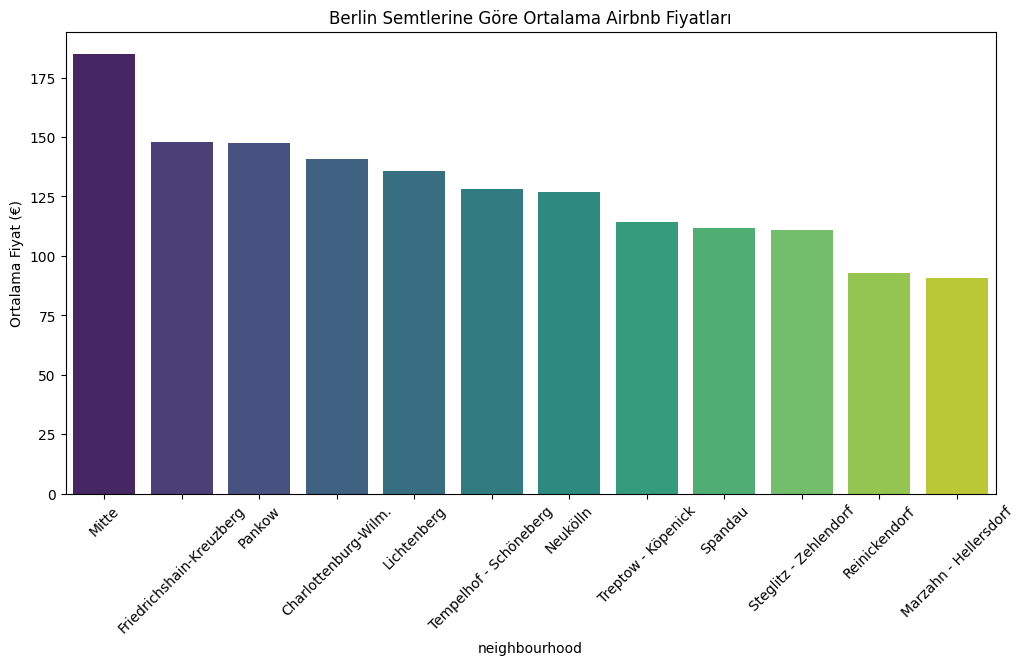

In [16]:
# Adım 1: Mahallelere göre grupla ve ortalama fiyatı bul, sonra pahalıdan ucuza sırala
semt_fiyatlari = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Adım 2: Görselleştir (Grafik çiz)
plt.figure(figsize=(12, 6)) # Çerçevenin boyutunu ayarla
sns.barplot(x=semt_fiyatlari.index, y=semt_fiyatlari.values, palette='viridis')

plt.xticks(rotation=45) # Alttaki yazılar birbirine girmesin diye eğdik
plt.title('Berlin Semtlerine Göre Ortalama Airbnb Fiyatları')
plt.ylabel('Ortalama Fiyat (€)')
plt.show()